The problem is that the previous notebook didn't understand how to make sense of the layers/annotations in of the tomogram. it was rather dumb in the way it determined which layer was correct for the onehot matrix.

We actually need to consider what the data of each annotation actually means

In [3]:
import h5py
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


In [4]:
def load_image( filepath, leaf='MDF/images/0/image', astype='uint8' ):
    """ load the specified hdf file and look for a 3d intensity map; normalise output """
    f = h5py.File(filepath)
    # f.visit(print)
    d = f[leaf].value
    print('%s,\tshape=%s,\tmin=%s,\tmax=%s,\tmean=%s,\tstd=%s' % (filepath, d.shape, np.min(d), np.max(d), np.mean(d), np.std(d)) )
    return d, d.shape

In [5]:

def load_tomogram( d ):
    data = {}
    dim = None
    for (label,filepath) in d.items():
        data[label], this_dim = load_image(filepath)
        if not dim:
            dim = this_dim
        else:
            if not dim == this_dim:
                raise IOException("Inconsistent tomogram dimensions for %s, expecting %s (got %s)" % (filepath,dim,this_dim))
    return data, dim

In [6]:
base_dir="/gpfs/slac/cryo/fs1/g/tomo-seg/chikv5th_t70_annotation/"
tomo, dimensions = load_tomogram( {
    'raw':        base_dir+"/chikvu2os_70.hdf",
    '2membrane':  base_dir+"/chiku2os_70_2membrane.hdf",
    'endosome':   base_dir+"/chiku2os_70_endosome.hdf",
    'filament':   base_dir+"/chiku2os_70_filament.hdf",
    'gp':         base_dir+"/chiku2os_70_gp.hdf",
    'mt':         base_dir+"/chiku2os_70_mt.hdf",
    'nc':         base_dir+"/chiku2os_70_nc.hdf",
    'ribosome':   base_dir+"/chiku2os_70_ribosome.hdf",
    'virion':     base_dir+"/chiku2os_70_virion.hdf",
} )

/gpfs/slac/cryo/fs1/g/tomo-seg/chikv5th_t70_annotation//chikvu2os_70.hdf,	shape=(161, 960, 928),	min=-676.0,	max=235.0,	mean=7.1588235,	std=15.150545
/gpfs/slac/cryo/fs1/g/tomo-seg/chikv5th_t70_annotation//chiku2os_70_2membrane.hdf,	shape=(161, 960, 928),	min=0.0,	max=2.1052153,	mean=0.0033039325,	std=0.024097877
/gpfs/slac/cryo/fs1/g/tomo-seg/chikv5th_t70_annotation//chiku2os_70_endosome.hdf,	shape=(161, 960, 928),	min=0.0,	max=3.0893054,	mean=0.00071198214,	std=0.019135872
/gpfs/slac/cryo/fs1/g/tomo-seg/chikv5th_t70_annotation//chiku2os_70_filament.hdf,	shape=(161, 960, 928),	min=0.0,	max=4.922564,	mean=0.00930983,	std=0.056080215
/gpfs/slac/cryo/fs1/g/tomo-seg/chikv5th_t70_annotation//chiku2os_70_gp.hdf,	shape=(161, 960, 928),	min=0.0,	max=14.150409,	mean=0.0038904266,	std=0.03882573
/gpfs/slac/cryo/fs1/g/tomo-seg/chikv5th_t70_annotation//chiku2os_70_mt.hdf,	shape=(161, 960, 928),	min=0.0,	max=1.8238752,	mean=0.00029554634,	std=0.013877892
/gpfs/slac/cryo/fs1/g/tomo-seg/chikv5th_t70

In [7]:
def crop( data, x=None, y=None, z=None, astype=None):
    """ crop out a 3d portion of the 3d matrix with tuples as defined on axes """
    def _slice( tup ):
        return slice(None) if not tup else slice(tup[0],tup[1])
    d = data[ _slice(x), _slice(y), _slice(z)]
    if astype:
        return d.astype(astype)
    return d

In [18]:
def show( data, title=None, low_threshold=None, high_threshold=None ):
    """ crude display out data """
    vmin=np.min(data)
    vmax=np.max(data)
    
    fig=plt.figure()
    if title:
        fig.suptitle(title, fontsize=16)
    
    if low_threshold == None:
        x,y,z=data.nonzero()
        v=data[data.nonzero()]
    else:
        x,y,z=np.where(data>low_threshold)
        v=data[np.where(data>low_threshold)]
    if not high_threshold == None:
        x,y,z=np.where(data<high_threshold)
        v=data[np.where(data<high_threshold)]
    
    ax = fig.add_subplot(111,projection='3d')
    scat = ax.scatter(x,y,z, c=v, marker='.', vmin=vmin,vmax=vmax, s=1)
    
    cbar = fig.colorbar(scat, orientation='vertical')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    return plt.show()


show some data to see

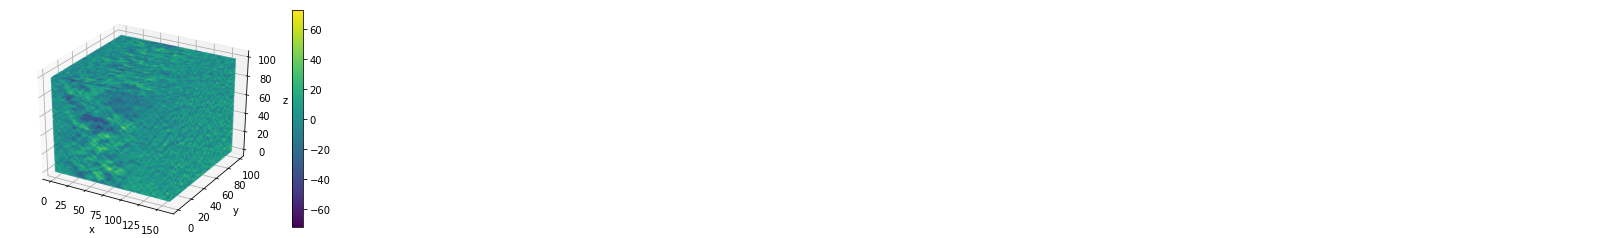

In [7]:
show( crop( tomo['raw'], x=None, y=(400,500), z=(400,500) ) )

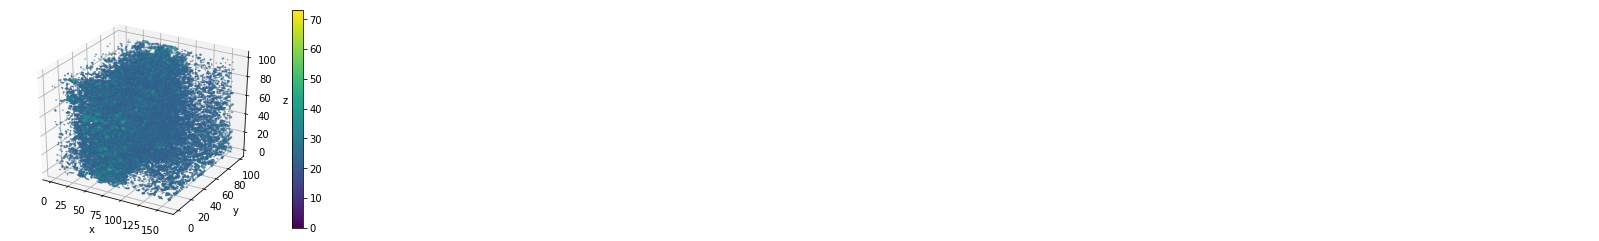

In [8]:
show( crop( np.abs(tomo['raw']), x=None, y=(400,500), z=(400,500) ), low_threshold=20 )

abs makes no sense. so don't do it!

let's explore what a small sections looks like

In [9]:
small_cube = crop( tomo['raw'], x=(0,100), y=(0,100), z=(0,100) )
abs_small_cube = np.abs(small_cube)

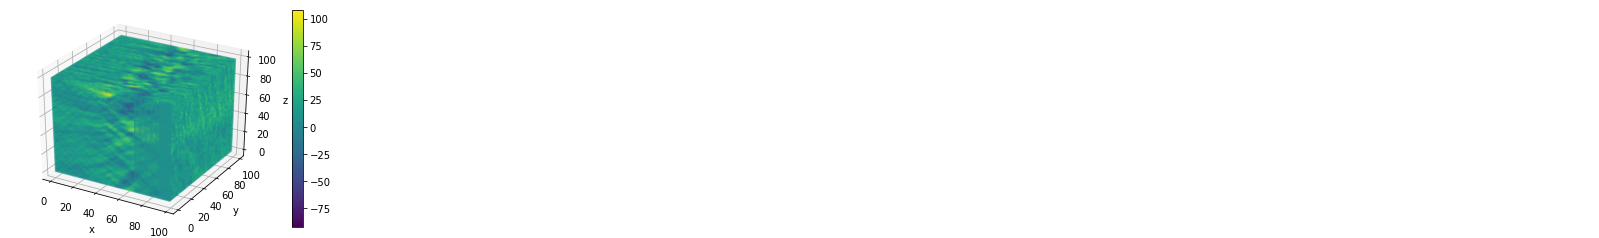

In [10]:
show( small_cube, low_threshold=-40 )

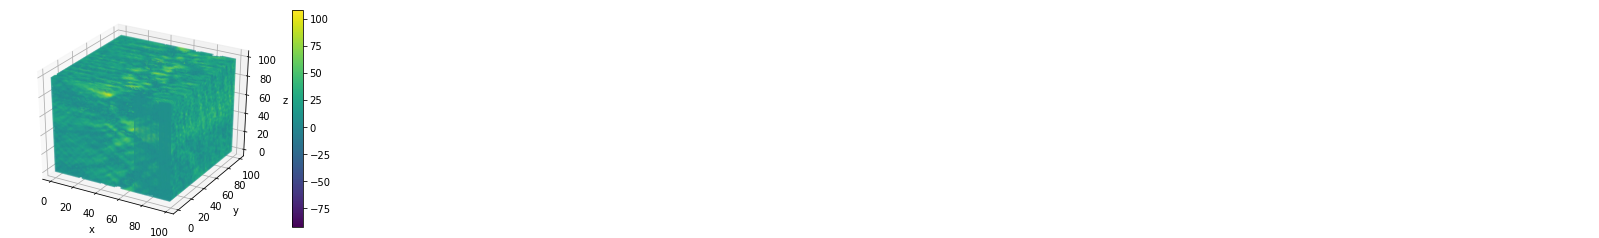

In [11]:
show( small_cube, low_threshold=0 )

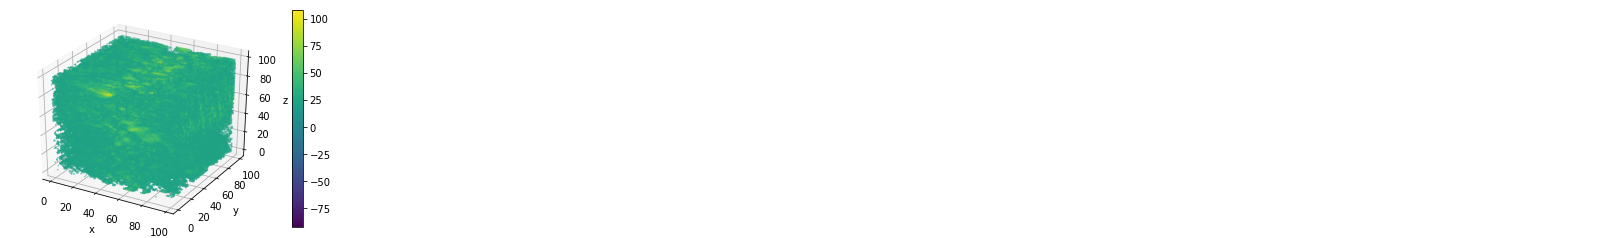

In [12]:
show( small_cube, low_threshold=20 )

In [20]:
dx = (0,100)
dy = (200,400)
dz = (200,400)

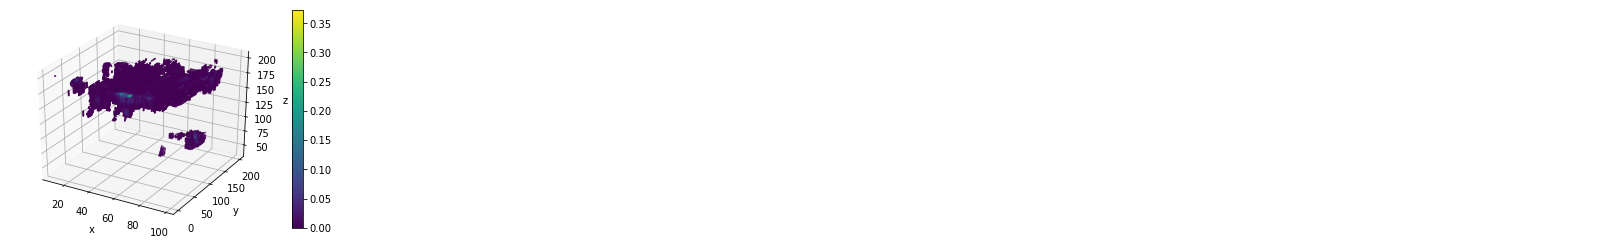

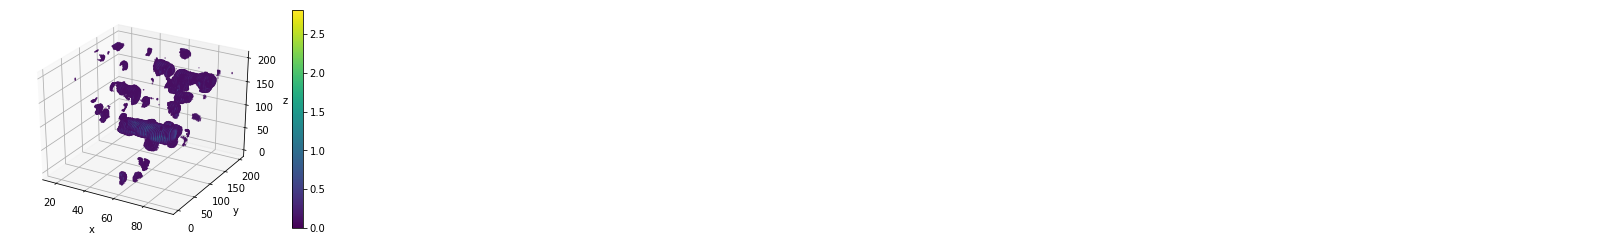

In [21]:
show( crop( tomo['2membrane'], x=dx, y=dy, z=dz ) )
show( crop( tomo['nc'], x=dx, y=dy, z=dz ), low_threshold=0.1 )

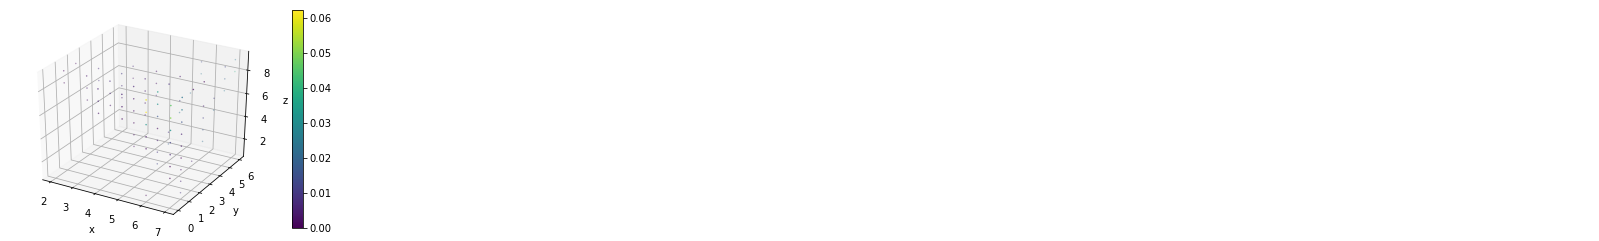

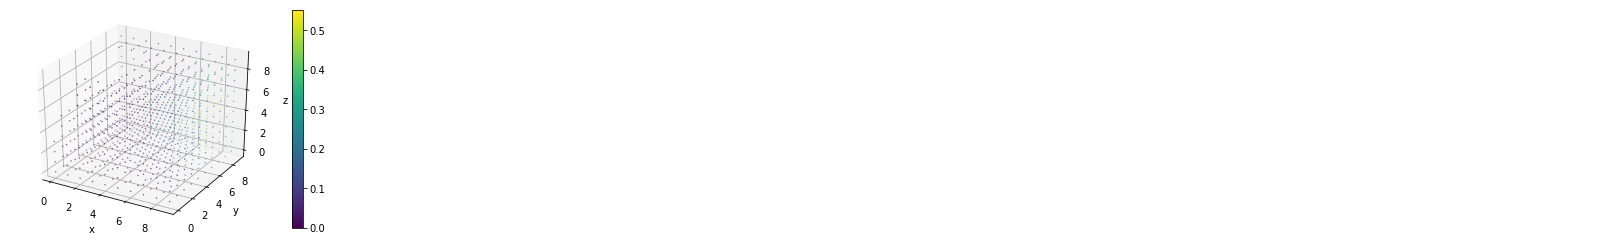

In [29]:
show( crop( tomo['2membrane'], x=(70,80), y=(360,370), z=(360,370) ) )
show( crop( tomo['nc'], x=(70,80), y=(360,370), z=(360,370) ) )

lets see if any of the two layers have data that overlap - what does it mean when it does overlap? how do we determine which to use?

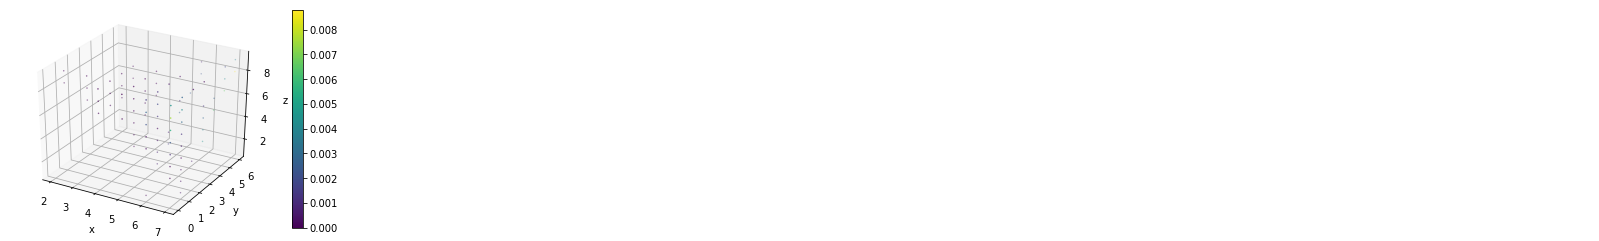

In [35]:
show( crop( tomo['2membrane'], x=(70,80), y=(360,370), z=(360,370) ) * crop( tomo['nc'], x=(70,80), y=(360,370), z=(360,370) ) )

lets create a matrix and write it to file; then read it in chimera to see what it looks like

In [42]:
a = np.zeros((500, 500, 500))
a[300:350,300:350,300:350] = 1.
a.shape

(500, 500, 500)

In [43]:
with h5py.File('test.hdf', 'w')  as f:
    f.create_dataset('MDF/images/0/image', data=a)